# T001 · Scaffold-Based data split
Authors:

- Vahid Atabaigielmi, CADD seminar 2023, Volkamer lab, Center for Bioinformatics, Saarland University
- First and last name, year(s) of contribution, lab, institution

## Aim of this talktorial

The aim of this talktorial is to to experiment with different scaffold_based splitting strategies and evaluate the performance of the neural network model on  test sets to determine the most appropriate splitting approach.

### Contents in *Theory*

_Add Table of Contents (TOC) for Theory section._

* Information leakage
* Molecular scaffold definition
* Data spliting methods
> * Random based spliting
> * Similarity-based Cold-Single Split
> * Identity-based Cold-Single Split
* Model

### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._
* Import the Data
* Random split
* Similarity-based Cold-Single Split
* Identity-based Cold-Single Split
* Plot trainng and test sets
* Preprocessing data
* Model
* Traning
* Evaluation

### References


* <i>Journal of cheminformatics</i> (2021), <b>13(1)</b>, 1-14 (https://doi.org/10.1186/s13321-021-00576-2)
* <i>pharmacometrics & systems pharmacology</i> (2020), <b>9(3</b>, 129-142 (https://doi.org/10.1002/psp4.12491)
* <i>Journal of medicinal chemistry</i> (1996), <b>39(15)</b>, 2887-2893 (https://doi.org/10.1021/jm9602928)
* <i>Molecular informatics</i> (2011), <b>30(8)</b>, 646-664 (https://doi.org/10.1002/minf.201100078)
* **Talktorial T004** [https://projects.volkamerlab.org/teachopencadd/talktorials/T004_compound_similarity.html]
* **Talktorial T022** [https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/talktorial.ipynb]
* dataSAIL Document [https://datasail.readthedocs.io/en/latest/index.html]
* [https://github.com/kalininalab/DataSAIL/blob/main/docs/index.rst]
* ChEMBL web services: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881) 

## Theory

### Information leakage
Data leakage is a widespread and critical error that often occurs during the development of machine learning models. The concept of data leakage can be defined in two ways: (i) it happens when information from sources outside the training dataset is utilized to construct the model, or (ii) it occurs when the data used for training a machine learning algorithm coincidentally contains the information being predicted. This leakage of data can have several negative consequences, such as diminishing the model's ability to generalize (overfitting), overestimating the model's performance, or rendering the model entirely invalid. An example of data leakage commonly observed is when data from the test or validation dataset seeps into the training dataset.
To avoid data leakage, it is essential to perform data preparation tasks like normalizing variables, engineering features or clustring the data based on their similarety  dataset before spliting  it into training and test sets. The most straightforward approach for splitting data is a random split, however this is not ideal for structure-activity models. The series effect, also known as the series bias or series-dependent bias, refers to a phenomenon commonly observed in quantitative structure-activity relationship (QSAR) modeling. It arises when the data used for training and testing a QSAR model contain chemical compounds that are structurally similar or part of the same chemical series.

In QSAR modeling, the goal is to establish a relationship between the structural features (descriptors) of chemical compounds and their corresponding activity or property. However, if the data used for training and testing the model primarily consist of compounds from a few closely related chemical series, it can lead to an inflated model performance during cross-validation but poor generalization to compounds from different series in a prospective setting.

The series effect occurs because QSAR models tend to learn and exploit the common structural scaffold patterns within the training data. When the test data contains compounds that are structurally similar to the training compounds, the model may perform well due to the presence of shared descriptors and structural features. However, when the model encounters compounds from different chemical series in real-world applications, it may fail to accurately predict their activities or properties because it hasn't learned the relevant patterns for those series.

To mitigate the series effect and evaluate the generalizability of a QSAR model, it is important to carefully design the training and testing data sets. One suggested method, as mentioned is clustring the data according to their similarities and subsequently dividing the clusters into training and test sets. Nevertheless, this approach carries a disadvantage: it can no longer ensure a expected split ratio between the training and test sets. However recently a package for python has been develpoed to address this probelm. DataSAIL is a tool designed to partition data in a manner that minimizes information leakage. This tool approaches dataset splitting as a constrained minimization problem, where it determines the assignment of data points to different partitions by minimizing an objective function that considers the amount of information leakage.
The aim of this talktorial is to to experiment with different scaffold_based splitting strategies available in Datasail and evaluate the performance of the feed forward neural network model on  test sets to determine the most appropriate splitting approach. DataSAIL utilizes disciplined quasi-convex programming and binary quadratic programs as its framework for expressing the optimization objective. When it comes to solving such problems, Datasail relies on SCIP, a swift non-commercial solver, as well as MOSEK, a commercial solver that offers complimentary licenses for academic purposes.

### Molecular Scaffold definition
A molecular scaffold refers to the core structure of a molecule, which is composed of its ring systems, linkers, and exocyclic double bonds. It is obtained by removing all terminal side chains from the molecule, while retaining any double bonds that exist in the structure.
The concept of a molecular scaffold is particularly relevant in the study of cyclic molecules, where the focus is on the central ring system and its connectivity with other components. By simplifying the structure to its sacffold, researchers can analyze and compare the underlying core structure of different molecules, which can provide insights into their chemical properties and reactivity.
It's important to note that the molecular scaffold does not consider the specific substituents or functional groups attached to the rings or linkers. Instead, it provides a simplified representation of the cyclic structure, highlighting its fundamental connectivity and double bond arrangement.

![Screenshot%202023-05-08%20at%2021.32.17.png](attachment:Screenshot%202023-05-08%20at%2021.32.17.png)

*Figure 1:* 
Murcko Scaffold: [Bemis, G. W., & Murcko, M. A. (1996). The properties of known drugs. 1. Molecular frameworks. Journal of medicinal chemistry, 39(15), 2887-2893.](https://academic.oup.com/nar/article/43/W1/W612/2467881). 

### Datasail's spliting methods

#### Random-based splitting
This is a simple and commonly used method where the data is randomly divided into subsets. The random splitting can be performed in various ways, such as random assignment of samples to different subsets or randomly shuffling the entire dataset and then dividing it into subsets.

#### Similarity-based Cold-Single Split (CCSe)
The process involves dividing a dataset into separate groups or clusters based on the similarity of the data points. This division is done to minimize the sharing of information between the different clusters. The process involves dividing a dataset into separate groups or clusters based on the scaffold similarity of the molecules. This division is done to minimize the sharing of information between the different clusters. The aim is to ensure that the same molecule is not present in more than one cluster 

#### Identity-based Cold-Single Split (ICSe)
The dataset is divided into separate splits based on the IDs assigned to each data point. This approach guarantees that every data point is assigned to exactly one split, avoiding any duplication or omission. This becomes particularly advantageous when combined with the weighting of the data points.

When weights are assigned to the data points, the splits can be optimized to achieve the desired sizes while considering these weights. This optimization process takes into account the relative importance or significance of each data point, as determined by its weight. By incorporating the weights, the splits can be tailored to meet specific requirements regarding the sizes of the resulting subsets while ensuring that the distribution of important data points is appropriately represented in each split.

In summary, splitting the dataset based on data point IDs ensures that every data point appears in only one split, and when combined with weighting, it allows for fine-tuning the splits to meet size requirements while considering the importance of each data point.

### Model
The feed-forward neural network utilized in this tutorial originates from **Talktorial T022**.

## Practical

### Import all the necessary libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D
from IPython.display import display, Markdown
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from chembl_webresource_client.new_client import new_client
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.ML.Cluster import Butina
from rdkit.Chem import MACCSkeys, Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric
from rdkit.DataStructs import FingerprintSimilarity
from rdkit.Chem import Descriptors, Draw, PandasTools, MolFromSmiles, MolToSmiles

In [3]:
# DataSAIL
#import datasail.reader.read_molecules
#from datasail.cluster.ecfp import run_ecfp
#from datasail.reader.utils import DataSet
#from datasail.cluster.ecfp import run_ecfp
#from datasail.reader.read_molecules import read_molecule_data
#from datasail.reader.utils import read_csv, DataSet, read_data

In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.data import DataLoader
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

In [5]:
# Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline

In [6]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "CHEMBL25_activities_EGFR.tsv"

### Import data
This code reads a file in TSV (tab-separated values) format and stores the data in a pandas DataFrame object named data.

In [7]:
data = pd.read_csv('CHEMBL25_activities_EGFR.tsv', sep='\t')
data.head()

,chembl_id,canonical_smiles,IC50,pIC50
0,CHEMBL207869,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,77.0,7.113509
1,CHEMBL3940060,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,330.0,6.481486
2,CHEMBL3678951,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,1.0,9.000000
3,CHEMBL504034,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,40.0,7.397940
4,CHEMBL158797,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,43000.0,4.366531


This code adds a new column called 'Molecule' to the existing pandas DataFrame data. The values in the 'Molecule' column are computed based on the values in the 'canonical_smiles' column using the apply() method and the Chem.MolFromSmiles() function from the RDKit library.

In [8]:
data['Molecule'] = data['canonical_smiles'].apply(Chem.MolFromSmiles)

### Similarity-based Cold-Single Split (CCSe)

This method splits the data based on the similarity of smiles structure, ensuring that each split contains similar smiles structure. To use this method, provide a similarity measure for smiles using the --e-sim option.

ECFP: an abbreviated term for the 3-step approach, facilitates the identification of clusters within a dataset containing chemical molecules. Initially, the process involves generating Scaffolds by implementing RDKits MakeScaffoldGeneric. This step simplifies molecules by substituting each heavy atom with a carbon atom and every bond with a single bond. Subsequently, a 1024-bit Morgan fingerprint with a radius of 2 is calculated in the second step. Finally, DataSAIL determines the similarity between these fingerprints using Tanimoto-Similarities based on the bit-vectors.for further informations about Morgan fingerprint and Tanimoto-Similaritiy please check Tutorial T004.

solver SCIP: This argument specifies the solver to be used for solving any optimization problems that may arise during the data splitting process.
After executing the command, the split data will be saved in the specified directory. We have already completed this step and stored the data. In the subsequent step, we will import the saved data for further preprocessing. this command is instructing the Datasail tool to perform data splitting on the molecule data using the CCSe technique, with an 80:20 split ratio for training and testing. 

In [9]:
#!datasail --e-type M --e-data output2500.tsv --e-sim ecfp --output PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/ --technique CCSe --splits 0.8 0.2 solver SCIP

In summary, the provided code reads two files that are the outputs of performing data split using the CCSe method.
cluster_CCSe DataFrame:('input8824_CCSe_SCIP_clusters.tsv')
This file contains information about which CHMBL_ID belongs to which cluster after performing the ICSe method for data splitting.
split_CCSe DataFrame:('input8824_CCSe_SCIP_splits.tsv')
This file contains information that indicates which CHMBL_ID belongs to the training and test sets after applying ICSe data splitting.

In [10]:
cluster_CCSe=pd.read_csv('input3859_CCSe_SCIP_clusters.tsv', sep='\t')
split_CCSe=pd.read_csv('input3859_CCSe_SCIP_splits.tsv', sep='\t')
cluster_CCSe.rename(columns={'ID': 'chembl_id'},inplace=True)

train_CCSe_id=split_CCSe[split_CCSe['Split'].isin(['Split000'])].rename(columns={'ID': 'chembl_id'})
test_CCSe_id=split_CCSe[split_CCSe['Split'].isin(['Split001'])].rename(columns={'ID': 'chembl_id'})

train_CCSe_t=data[data['chembl_id'].isin(train_CCSe_id['chembl_id'])]
test_CCSe_t=data[data['chembl_id'].isin(test_CCSe_id['chembl_id'])]

train_CCSe = pd.merge(train_CCSe_t, cluster_CCSe, on='chembl_id')
test_CCSe = pd.merge(test_CCSe_t, cluster_CCSe, on='chembl_id')

### Identity-based Cold-Single Split (ICSe)

Identity-based Cold-Single Split (ICSe): This method splits the data based on the identity of canonical_smiles, ensuring that each split contains unique canonical_smiles values.

In [11]:
#!datasail --e-type M --e-data output2500.tsv --e-sim ecfp --output PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/ --technique ICSe --splits 0.8 0.2 solver SCIP

This line reads the split information from the specified TSV file (input8824_ICSe_SCIP_splits.tsv) into a pandas DataFrame called split_ICSe.

In [12]:
split_ICSe=pd.read_csv('input3859_ICSe_SCIP_splits.tsv', sep='\t')

The following code selects rows from the split_ICSe DataFrame based on the value in the 'Split' column. Specifically, it selects rows where the 'Split' column has the label 'Split000' for the training set and 'Split001' for the test set. Therefore, by utilizing the information in the 'Split' column, we can separate the 'molecule_chembl_id' of the training and test sets.

In [13]:
train_ICSe_id=split_ICSe[split_ICSe['Split'].isin(['Split000'])].rename(columns={'ID': 'chembl_id'})
test_ICSe_id=split_ICSe[split_ICSe['Split'].isin(['Split001'])].rename(columns={'ID': 'chembl_id'})
train_ICSe = pd.merge(train_ICSe_id, data, on='chembl_id')
test_ICSe = pd.merge(test_ICSe_id, data, on='chembl_id')

### Random Split

In [14]:
train_RAND, test_RAND = train_test_split(data, test_size=0.2, random_state=42)

## Molecular encoding

We convert the SMILES string to numerical data, so called MACCS fingerprints, to apply a neural network.

In [15]:
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.
    """

    # Convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        return np.array(GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits))
    if method == "morgan3":
        return np.array(GetMorganFingerprintAsBitVect(mol, 3, nBits=n_bits))
    else:
        print(f"Warning: Wrong method specified: {method}." " Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

## Convert all SMILES strings to MACCS fingerprints.

In [16]:
train_RAND["fingerprints"] = train_RAND["canonical_smiles"].apply(smiles_to_fp)
test_RAND["fingerprints"] = test_RAND["canonical_smiles"].apply(smiles_to_fp)

In [17]:
train_CCSe["fingerprints"] = train_CCSe["canonical_smiles"].apply(smiles_to_fp)
test_CCSe["fingerprints"] = test_CCSe["canonical_smiles"].apply(smiles_to_fp)

In [18]:
train_ICSe["fingerprints"] = train_ICSe["canonical_smiles"].apply(smiles_to_fp)
test_ICSe["fingerprints"] = test_ICSe["canonical_smiles"].apply(smiles_to_fp)

## Define neural network
A keras model is defined by specifying the number of neurons in the hidden layers and the activation function as arguments. For our purpose, we define a model with two hidden layers. We use ReLU in the hidden layers and a linear function on the output layer, since the aim is to predict IC50 values. Finally, we compile the model using the mean squared error as a loss function and adam as an optimizer.

In [19]:
def neural_network_model(hidden1, hidden2):
    """
    Creating a neural network from two hidden layers
    using ReLU as activation function in the two hidden layers
    and a linear activation in the output layer.

    Parameters
    ----------
    hidden1 : int
        Number of neurons in first hidden layer.

    hidden2: int
        Number of neurons in second hidden layer.

    Returns
    -------
    model
        Fully connected neural network model with two hidden layers.
    """

    model = Sequential()
    # First hidden layer
    model.add(Dense(hidden1, activation="relu", name="layer1"))
    # Second hidden layer
    model.add(Dense(hidden2, activation="relu", name="layer2"))
    # Output layer
    model.add(Dense(1, activation="linear", name="layer3"))

    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse", "mae"])
    return model

## Train the model
We try different mini-batch sizes and plot the respective losses.

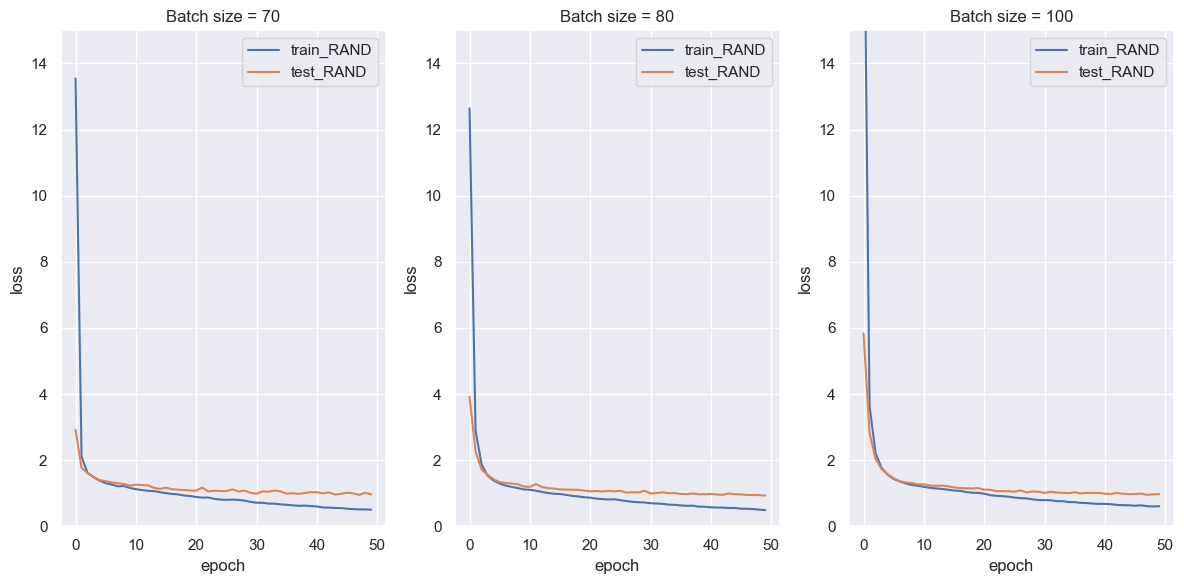

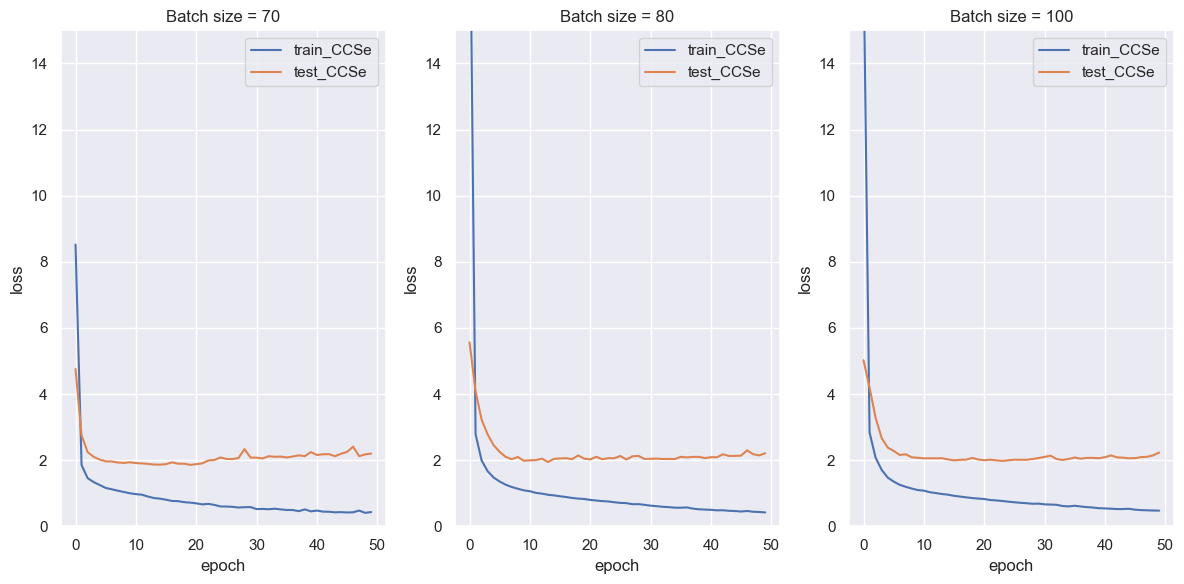

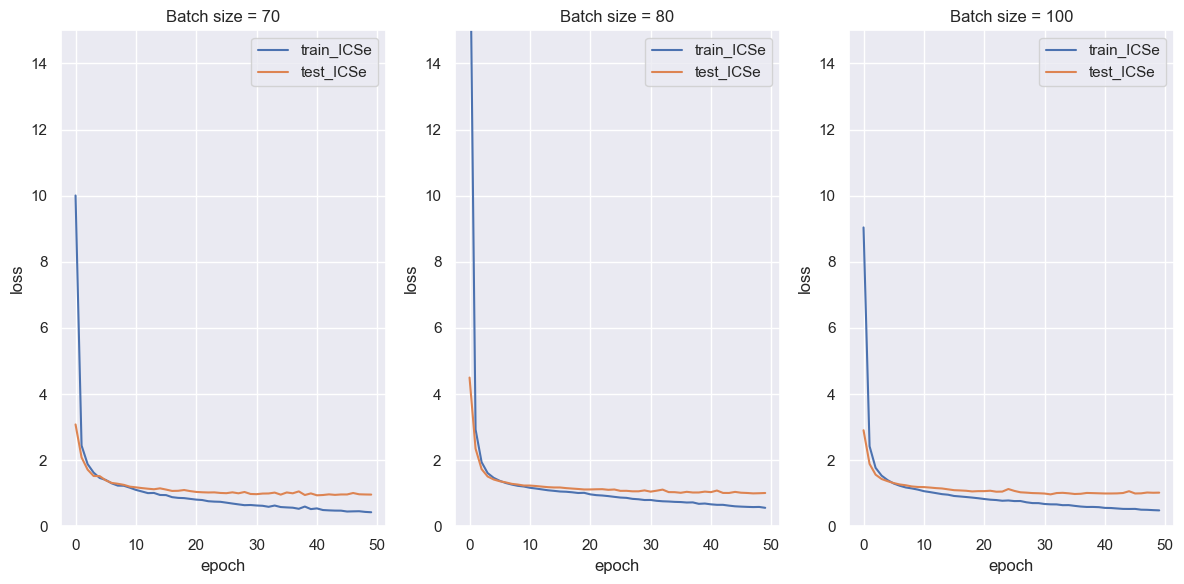

In [54]:


# List of data splits
data_splits = [(train_RAND, test_RAND, 'RAND'),
               (train_CCSe, test_CCSe, 'CCSe'),
               (train_ICSe, test_ICSe, 'ICSe')]

# Neural network parameters
batch_sizes = [70,80,100]
nb_epoch = 50
layer1_size = 64
layer2_size = 32

sns.set(color_codes=True)

for train_data, test_data, label in data_splits:
    fig = plt.figure(figsize=(12, 6))
    
    for index, batch in enumerate(batch_sizes):
        ax = fig.add_subplot(1, len(batch_sizes), index + 1)

        model = neural_network_model(layer1_size, layer2_size)

        # Fit model on train_data
        history = model.fit(
            np.array(list((train_data['fingerprints']))).astype(float),
            train_data['pIC50'].values,
            batch_size=batch,
            validation_data=(np.array(list((test_data['fingerprints']))).astype(float), test_data['pIC50'].values),
            verbose=0,
            epochs=nb_epoch,
        )

        ax.plot(history.history["loss"], label=f"train_{label}")
        ax.plot(history.history["val_loss"], label=f"test_{label}")

        ax.legend(loc="upper right")
        ax.set_ylabel("loss")
        ax.set_xlabel("epoch")
        ax.set_ylim((0, 15))
        ax.set_title(f"Batch size = {batch}")

    plt.tight_layout()
    plt.show()



## Fit the models

In [55]:
# Function to save the trained model
def fit_model(split_name,train_data,b_size=60):
    model= neural_network_model(layer1_size, layer2_size)
    filepath = f"{split_name}.hdf5"
    checkpoint = ModelCheckpoint(
        filepath,
        monitor="loss",
        verbose=0,
        save_best_only=True,
        mode="min",
        save_weights_only=True,
    )
    callbacks_list = [checkpoint]
    # Fit the model
    model.fit(
        np.array(list(train_data['fingerprints'])).astype(float),
        train_data['pIC50'].values,
        epochs=nb_epoch,
        batch_size=b_size,
        callbacks=callbacks_list,
        verbose=0,
    )
    return model

# Create and train models
model_RAND = fit_model("RAND",train_RAND,b_size=80)

model_CCSe = fit_model("CCSe",train_CCSe,b_size=80)

model_ICSe = fit_model("ICSe",train_ICSe,b_size=80)


## Evaluation & prediction on test set
The evaluate() method is used to check the performance of our model. It reports the loss (which is the mse in our case) as well as evaluation metrics (which are the mse and mae).

In [56]:
def evaluation(train_data, test_data,model, split_method):
    print(f"Evaluate the model on the test data in {split_method} ")
    scores = model.evaluate(np.array(list((test_data['fingerprints']))), test_data['pIC50'].values, verbose=0)
    print(f" loss: {scores[0]:.2f}")
    print(f" Mean Squared Error (MSE) (same as loss): {scores[1]:.2f}")
    print(f" Mean Absolute Error (MAE): {scores[2]:.2f}")

In [57]:
evaluation(train_RAND, test_RAND,model_RAND,'random split')
evaluation(train_CCSe, test_CCSe,model_CCSe,'CCSe split')
evaluation(train_ICSe, test_ICSe,model_ICSe,'ICSe split')

Evaluate the model on the test data in random split 
 loss: 0.92
 Mean Squared Error (MSE) (same as loss): 0.92
 Mean Absolute Error (MAE): 0.73
Evaluate the model on the test data in CCSe split 
 loss: 2.25
 Mean Squared Error (MSE) (same as loss): 2.25
 Mean Absolute Error (MAE): 1.17
Evaluate the model on the test data in ICSe split 
 loss: 0.99
 Mean Squared Error (MSE) (same as loss): 0.99
 Mean Absolute Error (MAE): 0.76


In [58]:
RAND_pred = model_RAND.predict(np.array(list(test_RAND['fingerprints'])))
CCSe_pred = model_CCSe.predict(np.array(list(test_CCSe['fingerprints'])))
ICSe_pred = model_ICSe.predict(np.array(list(test_ICSe['fingerprints'])))


25/25 [==============================] - 0s 349us/step


## Scatter plot
To visualize the predictions, we plot the predicted vs. the true pIC50 values on the test set.

In [65]:
def scatter_plot(prediction, test_data, split_method):
    limits = 0, 15
    fig, ax = plt.subplots()
    ax.scatter(prediction, test_data['pIC50'], marker=".")
    lin = np.linspace(*limits, 100)
    ax.plot(lin, lin)
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlabel("Predicted values")
    ax.set_ylabel("True values")
    ax.set_title(f"Scatter plot: pIC50 values for {split_method}")
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    return plt.show()

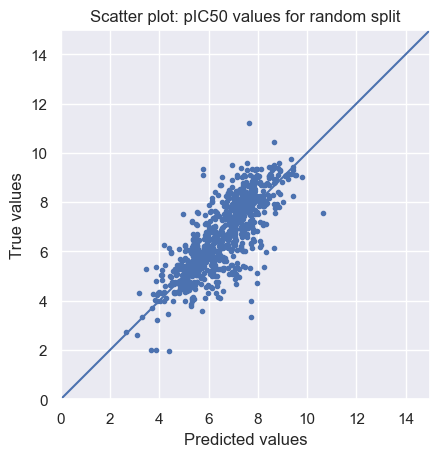

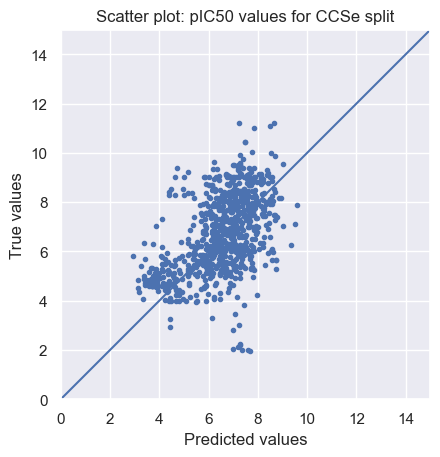

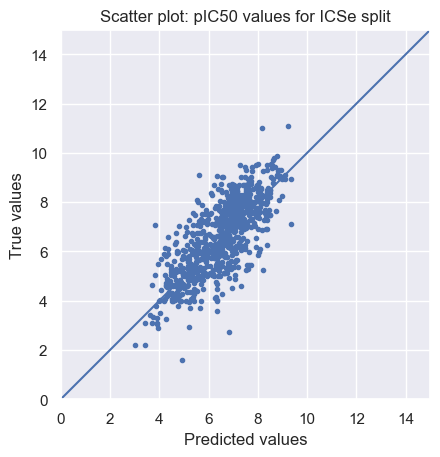

In [66]:
scatter_plot(RAND_pred, test_RAND,'random split')
scatter_plot(CCSe_pred, test_CCSe, 'CCSe split')
scatter_plot(ICSe_pred, test_ICSe, 'ICSe split')